In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [18]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dim1s=[]
dim2s=[]
dim3s=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron(X,X)


MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T3,T3])

T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron(np.eye(2),np.eye(2))


MPO3 = iMPS.iMPO()
MPO3.construct_from_tensor_list([T3,T3])


#rng = list(np.arange(0,0.42,0.02))
rng = list(np.arange(0.4,0.5,0.002))
#rng = rng+list(np.arange(0.46,0.8,0.02))
for h in rng:   
    
    h1 = h
    h2 = 0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-11
    MPS.max_bond = 30
    MPS.construct_from_tensor_list([B,B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])
    """MPS_power = iMPS.MPS_power_method(MPS,MPO,max_bond=30)
    MPS_power.update(300,1e-5)
    """
    
    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=30)
    MPS_power2.update(300,1e-5)
    
    MPS_power3 = iMPS.MPS_power_method_twosite(MPS_power2.MPS2,MPO,max_bond=30)
    MPS_power3.update(200,1e-5)
    
    strap4 = iMPS.strap(MPS_power3.MPS2,MPO4,MPS_power3.MPS2)
    lam4 = strap4.calculate_eig()
    lam_list = []
    lam_list.append(lam4)
    for _ in range(20):    
        MPS_power3 = iMPS.MPS_power_method_twosite(MPS_power3.MPS2,MPO,max_bond=30)
        MPS_power3.update(200,1e-4)
        strap4 = iMPS.strap(MPS_power3.MPS2,MPO4,MPS_power3.MPS2)
        lam4 = strap4.calculate_eig()
        if abs(lam4-lam_list[-1])<=1e-3*lam4:
            break

    
    dim1s.append(MPS.chi[1])
    
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam2s.append(strap4.calculate_eig())
    
    
    lam4s.append(lam4)
    
    dim2s.append(MPS_power2.MPS2.chi[1])
    dim3s.append(MPS_power3.MPS2.chi[1])
    print(h)

0.4
0.402
0.404
0.406
0.40800000000000003
0.41000000000000003
0.41200000000000003
0.41400000000000003
0.41600000000000004
0.41800000000000004
0.42000000000000004
0.42200000000000004
0.42400000000000004
0.42600000000000005
0.42800000000000005
0.43000000000000005
0.43200000000000005
0.43400000000000005
0.43600000000000005
0.43800000000000006
0.44000000000000006
0.44200000000000006
0.44400000000000006
0.44600000000000006
0.44800000000000006
0.45000000000000007
0.45200000000000007
0.45400000000000007
0.45600000000000007
0.4580000000000001
0.4600000000000001
0.4620000000000001
0.4640000000000001
0.4660000000000001
0.4680000000000001
0.4700000000000001
0.4720000000000001
0.4740000000000001
0.4760000000000001
0.4780000000000001
0.4800000000000001
0.4820000000000001
0.4840000000000001
0.4860000000000001
0.4880000000000001
0.4900000000000001
0.4920000000000001
0.4940000000000001
0.4960000000000001
0.4980000000000001


In [10]:
dim3s

[14, 14, 18, 20, 30, 20, 14, 14, 12, 10]

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\langle X \\bar{X}\\rangle$')

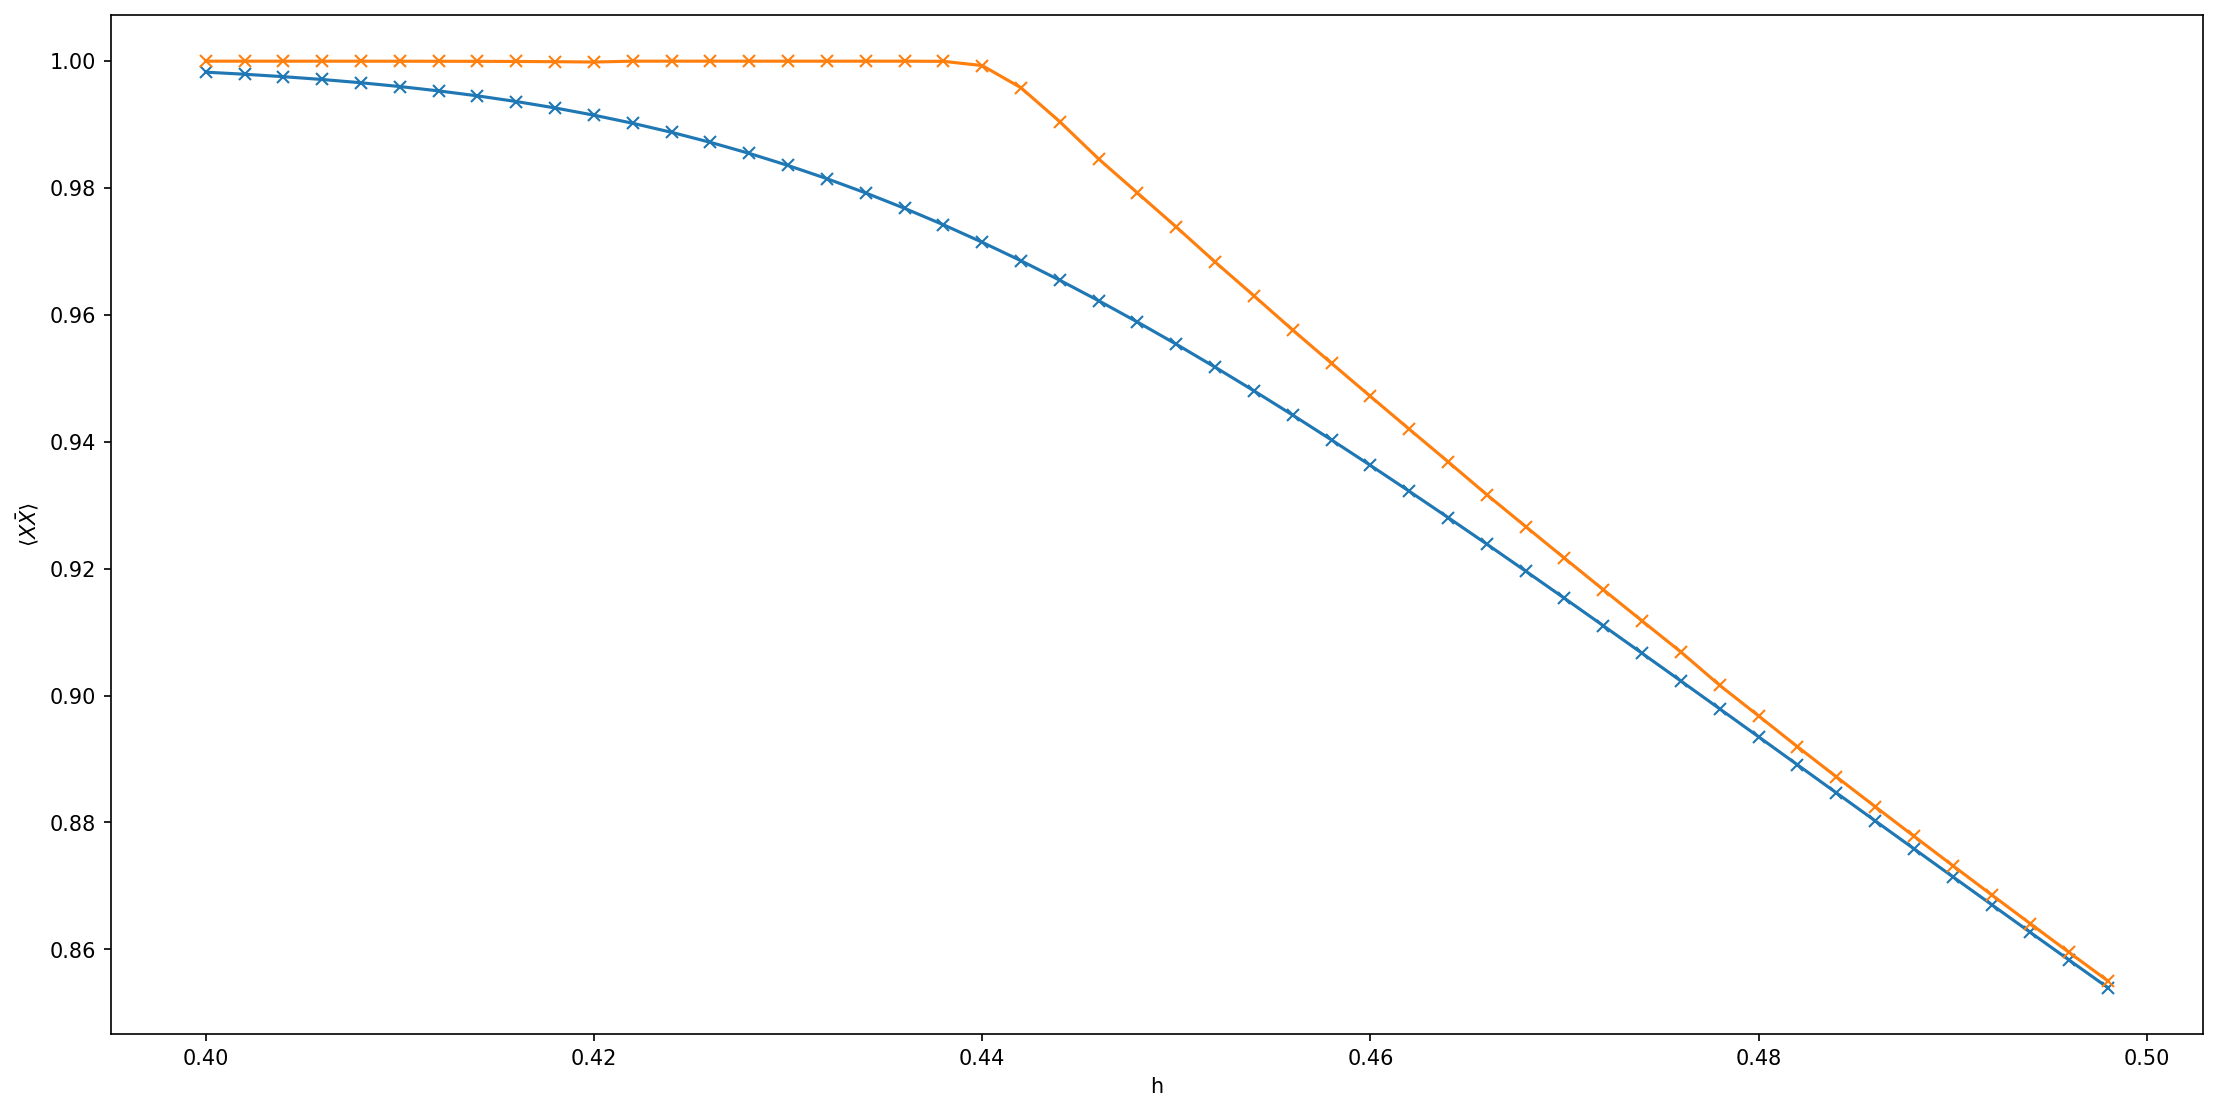

In [19]:
pyplot.figure(figsize=(18,9),dpi=150)
#pyplot.plot(rng,lam1s,'-x')
pyplot.plot(rng,lam2s,'-x')
#pyplot.plot(rng,lam3s,'-x')
pyplot.plot(rng,lam4s,'-x')
#pyplot.plot(rng,lam2s1,'-x')
pyplot.xlabel('h')
pyplot.ylabel('$\langle X \\bar{X}\\rangle$')
#pyplot.ylim([0.9,1.01])
#pyplot.xlim([0.4,0.5])
#pyplot.plot(rng,dim1s)
#pyplot.plot(rng,dim2s)

In [ ]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dim1s=[]
dim2s=[]
dim3s=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron(X,X)


MPO4 = iMPS.iMPO()
MPO4.construct_from_tensor_list([T3,T3])

T3 = np.zeros([1,1,4,4])
T3[0,0,:,:] = np.kron(np.eye(2),np.eye(2))


MPO3 = iMPS.iMPO()
MPO3.construct_from_tensor_list([T3,T3])


#rng = list(np.arange(0,0.42,0.02))
rng = list(np.arange(0.4,0.5,0.002))
#rng = rng+list(np.arange(0.46,0.8,0.02))
for h in rng:   
    
    h1 = h
    h2 = 0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.svd_threshold =1e-11
    MPS.max_bond = 30
    MPS.construct_from_tensor_list([B,B])
    
    trans = funcs.single_trans(h1=h1,h2=h2)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans,trans])
    """MPS_power = iMPS.MPS_power_method(MPS,MPO,max_bond=30)
    MPS_power.update(300,1e-5)
    """
    
    MPS_power2 = iMPS.MPS_power_method_twosite(MPS,MPO,max_bond=30)
    MPS_power2.update(300,1e-5)
    
    MPS_power3 = iMPS.MPS_power_method_twosite(MPS_power2.MPS2,MPO,max_bond=30)
    MPS_power3.update(200,1e-5)
    
    strap4 = iMPS.strap(MPS_power3.MPS2,MPO4,MPS_power3.MPS2)
    lam4 = strap4.calculate_eig()
    lam_list = []
    lam_list.append(lam4)
    for _ in range(20):    
        MPS_power3 = iMPS.MPS_power_method_twosite(MPS_power3.MPS2,MPO,max_bond=30)
        MPS_power3.update(200,1e-4)
        strap4 = iMPS.strap(MPS_power3.MPS2,MPO4,MPS_power3.MPS2)
        lam4 = strap4.calculate_eig()
        if abs(lam4-lam_list[-1])<=1e-3*lam4:
            break

    
    dim1s.append(MPS.chi[1])
    
    
    strap4 = iMPS.strap(MPS_power2.MPS2,MPO4,MPS_power2.MPS2)
    lam2s.append(strap4.calculate_eig())
    
    
    lam4s.append(lam4)
    
    dim2s.append(MPS_power2.MPS2.chi[1])
    dim3s.append(MPS_power3.MPS2.chi[1])
    print(h)